## Introduction to scikit-learn

## 0. An end-to-end Scikit-learn workflow

In [1]:
#0. Import standard python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get data ready-Import/load datasets
heart_disease=pd.read_csv('../Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (Feature matrix)
X=heart_disease.drop("target",axis=1)

# Create y (labels)
y=heart_disease["target"]


In [4]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# Split the datasets to training and test data 
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
# Train the model (Find patterns in the training data)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
# Make a prediction

y_preds=clf.predict(X_test)

In [8]:
y_preds

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [9]:
y_preds.shape

(61,)

In [10]:
y_test

88     1
244    0
64     1
44     1
212    0
      ..
91     1
117    1
78     1
20     1
240    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training and test data

clf.score(X_train,y_train)

1.0

In [12]:
 clf.score(X_test,y_test)

0.7540983606557377

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        31
           1       0.74      0.77      0.75        30

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[23,  8],
       [ 7, 23]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [16]:
# 5. Improve a model

# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators ...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%")
    print ("")

Trying model with 10 estimators ...
Model accuracy on test set:73.77%

Trying model with 20 estimators ...
Model accuracy on test set:77.05%

Trying model with 30 estimators ...
Model accuracy on test set:75.41%

Trying model with 40 estimators ...
Model accuracy on test set:72.13%

Trying model with 50 estimators ...
Model accuracy on test set:73.77%

Trying model with 60 estimators ...
Model accuracy on test set:77.05%

Trying model with 70 estimators ...
Model accuracy on test set:73.77%

Trying model with 80 estimators ...
Model accuracy on test set:75.41%

Trying model with 90 estimators ...
Model accuracy on test set:75.41%



In [17]:
# 6. Save the model and reload it
import pickle
pickle.dump(clf,open("random_forest_model1.pkl","wb"))

In [18]:
loaded_model=pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.7540983606557377

# 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels ('X' & 'y')
    2. Filling/imputing or disregarding missing values
    3. Converting non-numeric values to numeric values (feature encoding)

### Make sure that all data are numerical

In [24]:
car_sales=pd.read_csv('../Data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [40]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [27]:
# Split the data into X/y

X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [28]:
# Split into training and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

#model.fit(X_train,y_train)

#model.score(X_test,y_test)

### Categorical features

In [29]:
X["Make"].value_counts(), X["Colour"].value_counts(),X["Doors"].value_counts()

(Toyota    398
 Honda     304
 Nissan    198
 BMW       100
 Name: Make, dtype: int64,
 White    407
 Blue     321
 Black     99
 Red       94
 Green     79
 Name: Colour, dtype: int64,
 4    856
 5     79
 3     65
 Name: Doors, dtype: int64)

 ### Turn the categories into numbers


In [30]:
    
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                              categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
#refit 

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [35]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2330485230539474

## Dealing with missing values
 * Two ways
 
     1. Filling with some data (Imputing)
     2. Revome the samples with missing data altogether

In [36]:
# Import car sales extended missing data

car_sales_missing=pd.read_csv('../Data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [39]:
# Convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [42]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [43]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# Fill the "Odeometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True) #most (811) cars have 4 doors


In [44]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
## Remove rows with missing value
car_sales_missing.dropna(inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [49]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [50]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill the missing values with Scikit-learn

In [52]:
import pandas as pd
car_sales_missing=pd.read_csv('../Data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop  the  rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X/y

X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [56]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns

cat_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer=ColumnTransformer([("cat_impluter",cat_imputer,cat_features),
                           ("door_imputer",door_imputer,door_feature),
                           ("num_imputer",num_imputer,num_features)
                          ])
#Tranform the data

filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])

In [58]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [60]:
len(car_sales_filled)

950

In [61]:
 car_sales_filled["Doors"]=car_sales_filled["Doors"].astype(int)

In [62]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431.0
1,BMW,Blue,5,192714.0
2,Honda,White,4,84714.0
3,Toyota,White,4,154365.0
4,Nissan,Blue,3,181577.0


### Convert our data to numbers --Categories into numbers

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
category_features=["Make","Colour","Doors"]
transformer=ColumnTransformer([("one_hot",
                                one_hot,category_features)],
                                remainder="passthrough"
                             )
tranformed_X=transformer.fit_transform(car_sales_filled)
tranformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [64]:
len(transformed_X),len(y)

(950, 950)

### Fit

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

model.fit(X_train,y_train)

y_preds=model.predict(X_test)

In [66]:
y_preds

array([17059.33, 15125.98, 25353.  , 16085.43, 38225.95, 10442.68,
       20120.75, 12630.28, 25822.63, 38164.68, 13253.67, 19045.89,
        7902.06, 21819.86,  3941.13, 23864.91, 13563.79, 19564.94,
       14036.6 ,  9071.13,  7885.88, 22944.41,  7978.14,  9343.56,
        7811.59,  8738.95,  7805.87,  3909.04, 10856.22,  7097.66,
       24894.43,  7827.7 ,  9158.69, 13422.17, 39491.48, 29626.56,
       23317.47, 28685.94, 14436.71, 27585.39,  8944.85,  8356.46,
       24576.48, 11196.69, 13333.98, 11751.82,  6210.39, 17255.43,
        7979.01,  7259.95, 13564.78,  7825.52,  8100.46, 29060.88,
       18386.88,  8207.62, 33279.82, 15083.54, 29611.13, 12196.01,
       10706.35, 16872.38, 10254.03, 13209.06,  9921.65, 14628.29,
       20255.1 , 24289.92, 11282.49, 17933.62, 20903.13, 11130.26,
       28378.9 , 19696.58, 13314.73, 13139.4 ,  7812.42,  6875.55,
        9792.45,  9381.47, 12406.11, 10721.28, 12982.82, 29537.9 ,
       26659.35, 16193.84,  8089.95, 12606.82, 13259.11, 13535

## 2. Choosing the right model

In [67]:
### 2.1. Load the Scikit-learn default housing dataset

import pandas as pd
from sklearn.datasets import load_boston

boston=load_boston()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [68]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [69]:
#get data ready
X=boston_df.drop("target",axis=1)
y=boston_df["target"]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [70]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [71]:
#Splt X/y
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



#### Regression

In [72]:
# Boston housing Regression problem

In [73]:
#Choose the model

from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)


Ridge()

In [74]:
model.score(X_test,y_test)

0.640889873273767

In [75]:
## How to improve this score?

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

rfr.fit(X_train,y_train)


RandomForestRegressor()

In [76]:
rfr.score(X_test,y_test), model.score(X_test,y_test)

(0.7436998392596661, 0.640889873273767)

#### Choosing an estimator for classification

In [77]:
heart_disease=pd.read_csv('../Data/heart-disease.csv')
heart_disease.isna().sum();
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
#Prepare the data == X & y

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data as training and test datasets

from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2)


In [92]:
from sklearn.svm import LinearSVC

lcf=LinearSVC(max_iter=1000)

lcf.fit(X1_train,y1_train)

E:\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [93]:
lcf.score(X1_test,y1_test)

0.7868852459016393

In [94]:
# Choose the model== RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X1_train,y1_train)

RandomForestClassifier()

In [95]:
rfc.score(X1_test,y1_test)

0.7868852459016393

* If you have a structured data, use ensemble methods.
* If you have unstructured data, use deep learning or transfer learning.

### 3. Make predictions using a macine learning model

Two ways
 * predict()
 * predict_proba()

In [96]:
X1_test.shape

(61, 13)

In [97]:
y_preds=rfc.predict(X1_test)

In [98]:
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [99]:
import numpy as np
np.array(y1_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [100]:
# Compare predictions to truth labels of evaluate the model
np.mean(y_preds==y1_test)

0.7868852459016393

In [101]:
rfc.score(X1_test,y1_test)

0.7868852459016393

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y_preds)

0.7868852459016393

#### 'predict_proba()'

In [103]:
rfc.predict_proba(X1_test[:8])

array([[0.03, 0.97],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.27, 0.73],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.18, 0.82],
       [0.27, 0.73]])

In [104]:
rfc.predict(X1_test[:8])

array([1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [105]:
heart_disease["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [106]:
X_test[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
447,9.92485,0.0,18.10,0.0,0.740,6.251,96.6,2.1980,24.0,666.0,20.2,388.52,16.44
376,15.28800,0.0,18.10,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28


In [107]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X2=boston_df.drop("target",axis=1)
y2=boston_df["target"]

from sklearn.model_selection import train_test_split

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size=0.2)
rfr=RandomForestRegressor()
rfr.fit(X2_train,y2_train)

RandomForestRegressor()

In [109]:
rfr.score(X2_train,y2_train)

0.9763520974033731

In [110]:
y2_preds=rfr.predict(X2_test)
y2_preds[:6]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644])

In [111]:
np.array(y2_test[:6])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. ])

In [112]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y2_test,y2_preds)

2.136382352941176

In [113]:
rfr.score(X2_test,y2_test)

0.8654448653350507

## 4. Evaluating a model

Three ways to evaluate Scikit-learn models/estimators
 1. 'score' methods
 2. 'scoring' parameters
 3.  problem-specific functions
 
 #### 4.1 using 'score' method

In [114]:
from sklearn.ensemble import RandomForestClassifier

X3=heart_disease.drop("target",axis=1)
y3=heart_disease["target"]

from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,
                                                  y3,
                                                  test_size=0.2)
rfc=RandomForestClassifier()
rfc.fit(X3_train,y3_train)

RandomForestClassifier()

In [115]:
rfc.score(X3_train,y3_train)

1.0

In [116]:
rfc.score(X3_test,y3_test)

0.7704918032786885

In [117]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X2=boston_df.drop("target",axis=1)
y2=boston_df["target"]

from sklearn.model_selection import train_test_split

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size=0.2)
rfr=RandomForestRegressor()
rfr.fit(X2_train,y2_train)

RandomForestRegressor()

In [118]:
rfr.score(X2_train,y2_train)

0.9763520974033731

In [119]:
rfr.score(X2_test,y2_test)

0.8654448653350507

##### In gereral, 'score' method returns
* mean accuracy - for classification      
* coefficient of determination X^2 - for regression

#### 4.2 Using 'scoring' parameter

In [120]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

X3=heart_disease.drop("target",axis=1)
y3=heart_disease["target"]

from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,
                                                  y3,
                                                  test_size=0.2)
rfc=RandomForestClassifier()
rfc.fit(X3_train,y3_train)

RandomForestClassifier()

In [121]:
np.random.seed(42)
rfc_single_score=rfc.score( X3_test,y3_test)
rfc_cross_val_score=np.mean(cross_val_score(rfc, X3,y3,cv=5,scoring=None))
rfc_single_score, rfc_cross_val_score

(0.7704918032786885, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X5=heart_disease.drop("target",axis=1)
y5=heart_disease["target"]

clf=RandomForestClassifier()
from sklearn.model_selection import train_test_split
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,
                                                  y5,
                                                  test_size=0.2)
clf.fit(X5,y5)
cross_val_score=cross_val_score(clf,X5,y5,cv=5)

In [127]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 81.16%


**Area under Receiver Operating Characteristic curve (AUC/ROC)**
 * AUC - Area under curve
 * ROC
 
 ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)
 
 * True positive=model predicts 1 when truth is 1
 * False positive=model predicts 1 when truth is 0
 * True negative= model predicts 0 when truth is 0
 * False negative= model predicts 0 when truth is 1

In [128]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

heart_disease=pd.read_csv('../Data/heart-disease.csv')
np.random.seed(42)


X6=heart_disease.drop("target",axis=1)
y6=heart_disease["target"]

clf=RandomForestClassifier()

from sklearn.model_selection import train_test_split
X6_train,X6_test,y6_train,y6_test=train_test_split(X6,
                                                  y6,
                                                  test_size=0.2)
clf.fit(X6_train,y6_train)

y6_probs=clf.predict_proba(X6_test)
y6_porb_positive=y6_probs[:,1]
y6_probs[:6], y6_porb_positive[:6]

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86]]),
 array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86]))

In [129]:
# Calculate fpr,tpr and thredsholds

fpr,tpr,thresholds=roc_curve(y6_test,y6_porb_positive)

In [130]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [131]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [132]:
thresholds

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

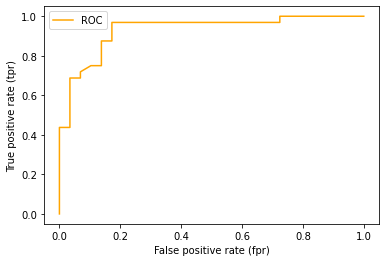

In [133]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plot a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #Plot line with no prediction power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)    

In [134]:
# AUC

from sklearn.metrics import roc_auc_score

roc_auc_score(y6_test,y6_porb_positive)

0.9304956896551724

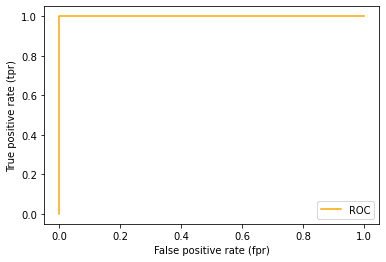

In [135]:
# Plot perfect ROC curve and AUC score

fpr,tpr,thresholds=roc_curve(y6_test,y6_test)
plot_roc_curve(fpr,tpr)

In [136]:
roc_auc_score(y6_test,y6_test)

1.0

**Confusion-matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [137]:
from sklearn.metrics import confusion_matrix

y_preds=rfc.predict(X6_test)

In [139]:
confusion_matrix(y6_test,y_preds)

array([[27,  2],
       [ 1, 31]], dtype=int64)

In [140]:
# visualize confusion matrix with pd.crosstab()

import pandas as pd

pd.crosstab(y6_test,
           y_preds,
           rownames=["Actaul labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actaul labels,,
0,27,2
1,1,31


In [142]:
27+1+2+31

61

In [143]:
len(y6_test), len(y_preds)

(61, 61)

# Install a seaborn package on the current env from jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [145]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix

conf_mat=confusion_matrix(y6_test,y_preds)

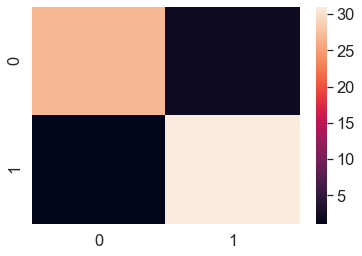

In [146]:
# Plot it using seaborn

sns.heatmap(conf_mat);